In [6]:
5*(120,90)


(120, 90, 120, 90, 120, 90, 120, 90, 120, 90)

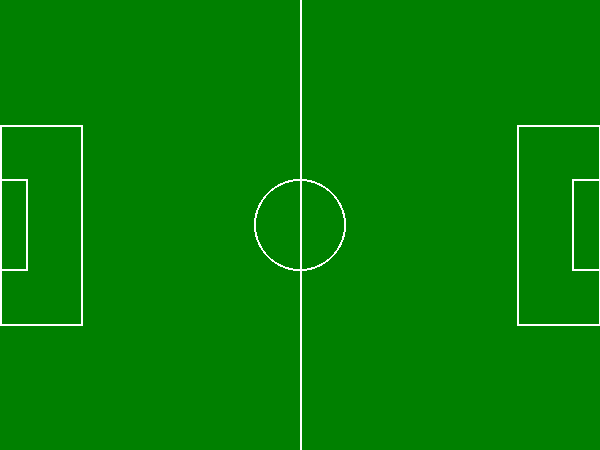

In [7]:
from gymnasium.core import RenderFrame
from PIL import Image, ImageDraw

scale = 5

width, height = 120 * scale, 90 * scale
field = Image.new("RGB", (width, height), "green")  # Green background for the field

# Use PIL's drawing module to add field lines or other details
draw = ImageDraw.Draw(field)

# Drawing center line and circle
draw.line([(width / 2, 0), (width / 2, height)], fill="white", width=2)  # Center line

center_line_radius = 9.15 * scale

draw.ellipse(xy=[
    (width / 2 - center_line_radius, height / 2 - center_line_radius),
    (width / 2 + center_line_radius, height / 2 + center_line_radius)], width=2)

outer_goal_height = 40 * scale
outer_goal_width = 16.5 * scale

inner_goal_height = 18.3 * scale
inner_goal_width = 5.5 * scale

goal_size = 7.32 * scale

# Drawing goals
draw.rectangle(xy=[
    (0, height / 2 - outer_goal_height / 2),
    (outer_goal_width, height / 2 + outer_goal_height / 2)
], width=2)

draw.rectangle(xy=[
    (0, height / 2 - inner_goal_height / 2),
    (inner_goal_width, height / 2 + inner_goal_height / 2)
], width=2)

draw.line(xy=[
    (0, height / 2 - goal_size / 2),
    (0, height / 2 + goal_size / 2),
])

draw.rectangle(xy=[
    (width - outer_goal_width, height / 2 - outer_goal_height / 2),
    (width, height / 2 + outer_goal_height / 2)
], width=2)

draw.rectangle(xy=[
    (width - inner_goal_width, height / 2 - inner_goal_height / 2),
    (width, height / 2 + inner_goal_height / 2)
], width=2)

draw.line(xy=[
    (width, height / 2 - goal_size / 2),
    (width, height / 2 + goal_size / 2),
])

field


c:\Users\Juan\anaconda3\envs\rlx\lib\site-packages\gymnasium\utils\passive_env_checker.py:295: UserWarning: WARN: Human rendering should return `None`, got <class 'PIL.Image.Image'>
  logger.warn(


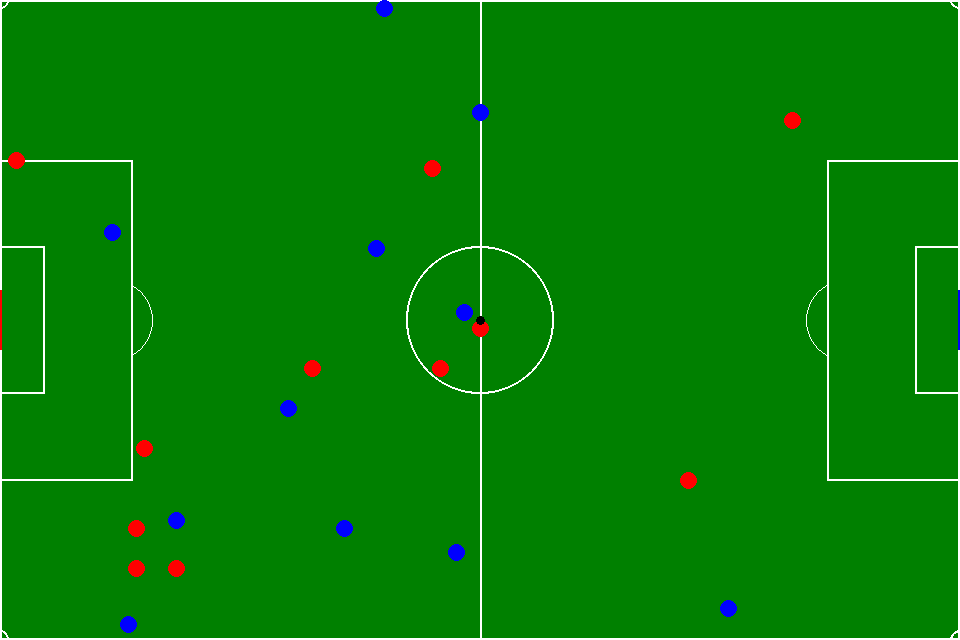

In [8]:
import gymnasium as gym
import env
from PIL import ImageChops 

env = gym.make("Soccer-v0", render_mode="human")

env.reset()

# env.step(0)

env.render()


### Observa a movimentação de cada ponto no campo
- Cada imagem mostra o ponto que moveu antes e depois simultaneamente
- Aumentar Velocity em constants.py deve facilitar visualizar a diferença

left_team player_0 move from ([35. 43.]) to ([37.7 40.3]) Indexes(0, 0)
left_team player_0 move from ([37.7 40.3]) to ([40.4 40.3]) Indexes(0, 0)
left_team player_0 move from ([40.4 40.3]) to ([43.1 43. ]) Indexes(0, 0)
left_team player_0 move from ([43.1 43. ]) to ([45.8 43. ]) Indexes(0, 0)
@@@@@@@@ Aconteceu kickoff @@@@@@@@
left_team player_0 move from ([45.8 43. ]) to ([45.8 40.3]) Indexes(0, 0)
Trocou time
right_team player_11 move from ([52. 16.]) to ([49.3 16. ]) Indexes(11, 1)
Trocou time
left_team player_1 move from ([99. 42.]) to ([80.  44.7]) Indexes(1, 2)
Trocou time
right_team player_12 move from ([99. 35.]) to ([80.  32.3]) Indexes(12, 3)
Trocou time
left_team player_2 move from ([70. 26.]) to ([72.7 28.7]) Indexes(2, 4)
Trocou time
right_team player_13 move from ([114.  50.]) to ([80.  52.7]) Indexes(13, 5)
Trocou time
left_team player_3 move from ([90. 49.]) to ([80.  51.7]) Indexes(3, 6)
Trocou time


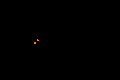

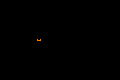

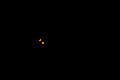

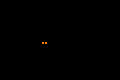

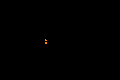

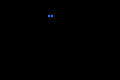

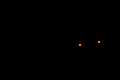

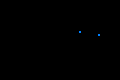

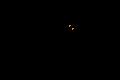

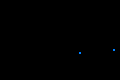

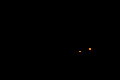

right_team player_14 move from ([19. 54.]) to ([16.3 54. ]) Indexes(14, 7)
Trocou time
left_team player_4 move from ([103.  36.]) to ([80.  38.7]) Indexes(4, 8)
Trocou time
right_team player_15 move from ([52. 57.]) to ([54.7 54.3]) Indexes(15, 9)
Trocou time
left_team player_5 move from ([107.  43.]) to ([80.  40.3]) Indexes(5, 10)
Trocou time
right_team player_16 move from ([49. 57.]) to ([46.3 57. ]) Indexes(16, 11)
Trocou time
left_team player_6 move from ([ 5. 39.]) to ([ 7.7 39. ]) Indexes(6, 12)
Trocou time
right_team player_17 move from ([17. 27.]) to ([19.7 24.3]) Indexes(17, 13)
Trocou time
left_team player_7 move from ([29.  7.]) to ([31.7  7. ]) Indexes(7, 14)
Trocou time
right_team player_18 move from ([50. 26.]) to ([52.7 23.3]) Indexes(18, 15)
Trocou time
left_team player_8 move from ([14. 78.]) to ([16.7 80.7]) Indexes(8, 16)
Trocou time
right_team player_19 move from ([15. 35.]) to ([15.  37.7]) Indexes(19, 17)
Trocou time


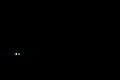

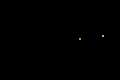

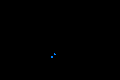

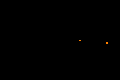

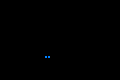

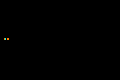

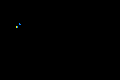

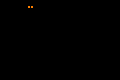

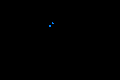

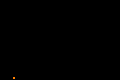

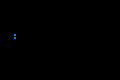

In [4]:
import gymnasium as gym
import env
import random
from PIL import ImageChops, ImageOps, Image

env = gym.make("Soccer-v0")

actions = list(range(8))

env.reset()

def img_process_pipeline(
        original_img, 
        replace_colors = False, 
        to_gray = False,
        shrink_image = True
    ): 
    modified_image = original_img

    if replace_colors:
        # Define the colors to replace (you can specify the exact RGB values)
        colors_to_replace = [(255, 0, 0), (0, 0, 255)]  # Red and Blue
        
        # Define the replacement color
        replacement_color = (255, 255, 255)  # White

        # Create a list of pixel data with colors replaced
        new_data = []

        for pixel in original_img.getdata():
            if pixel[:3] in colors_to_replace:
                new_data.append(replacement_color)
            else:
                new_data.append(pixel)

        # Create a new image with the replaced colors
        modified_image = Image.new(original_img.mode, original_img.size)
        modified_image.putdata(new_data)

    if to_gray:
        modified_image = ImageOps.grayscale(modified_image)

    if shrink_image:
        size = (120, 80)
        modified_image = modified_image.resize(size, Image.NEAREST)

    return modified_image

def images_per_team_complete_action(n = 2):
    first_image = env.render()
    images = [img_process_pipeline(first_image)]
    # display(images[0])
    for team_turn in range(n):
        for _ in range(11): # Left team action
            env.step(random.choice(actions))
            images.append(img_process_pipeline(env.render()))
            # display(images[_+1])

        differences = []
        for i in range(len(images) - 1): # Iterate over pairs of images
            image1 = images[i]
            image2 = images[i + 1] 
            diff = ImageChops.difference(image2, image1)
            differences.append(diff)

        for i in differences:
            display(i)

            pixel_data = list(i.getdata())
            total_pixel_sum = sum(sum(pixel) for pixel in pixel_data)

            if total_pixel_sum == 0:
                print("Imagem acima está toda preta, jogador não se moveu")


        # Reset images to recalculate for right team
        images = [images[-1]]

images_per_team_complete_action()


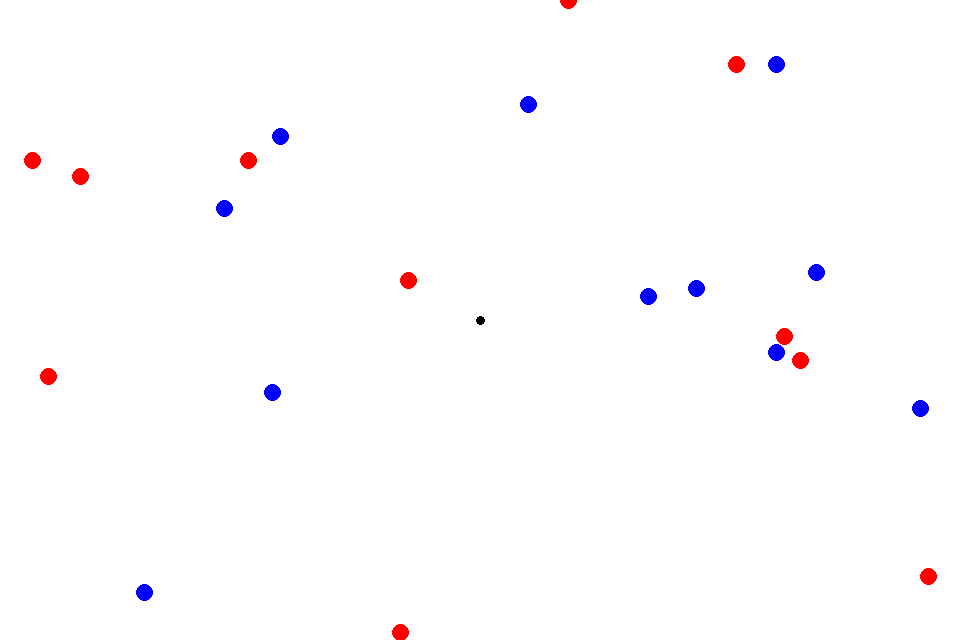

left_team player_0 move from ([ 4. 20.]) to ([ 6.7 20. ]) Indexes(0, 0)


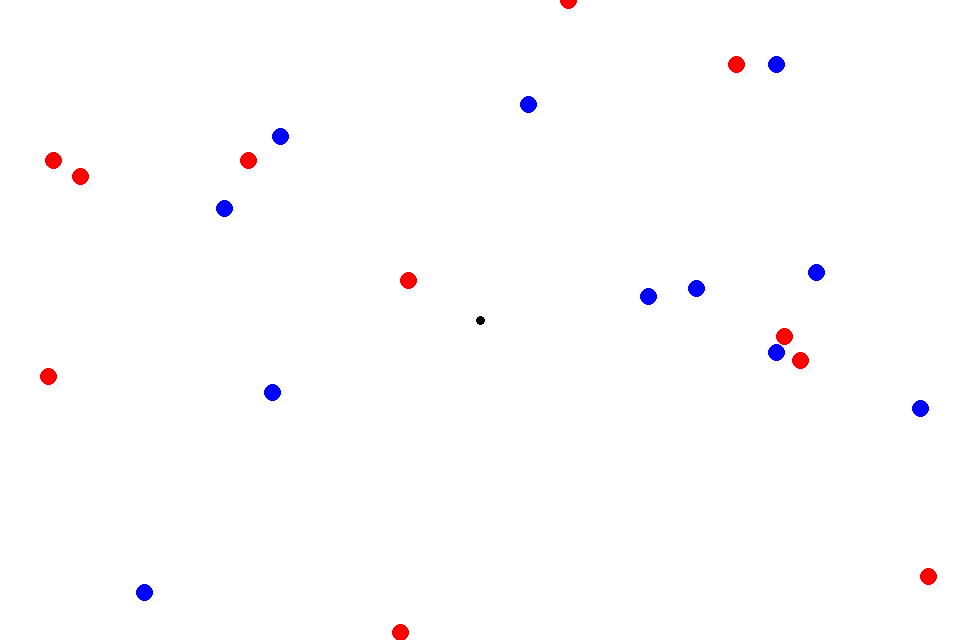

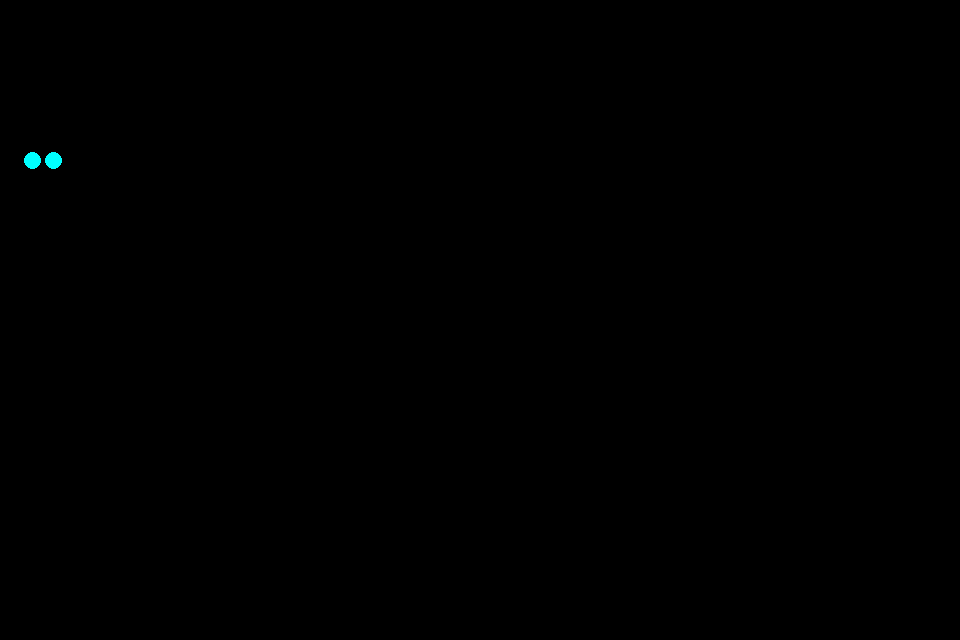

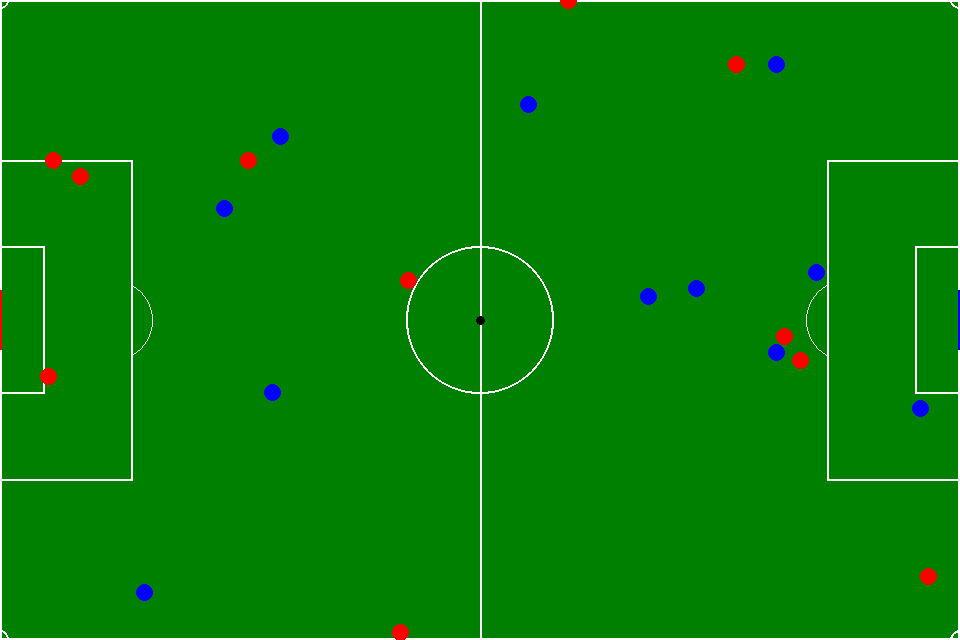

In [10]:
import gymnasium as gym
import env
import numpy as np
from IPython.display import Image, display
from PIL import Image, ImageChops 


#env = gym.make("Soccer-v0", render_mode="human", observation_format="dict")

env = gym.make("Soccer-v0")

obs, _  = env.reset()
image1 = obs
obs = np.array(obs, dtype=np.uint8)
image = Image.fromarray(obs)
display(image)

#print(obs)

obs, _,_,_, _ = env.step(0)
image2 = obs
obs = np.array(obs, dtype=np.uint8)
image = Image.fromarray(obs)
display(image)



diff = ImageChops.difference(image2, image1)
display(diff)
env.render()
